# Week9 Multicollinearity-Ridge Regression
## 背景描述  
由于多重共线性的问题本质上在于 $|X^{'}X|\approx 0$, 因此岭回归的本质就是在这个矩阵上做了手脚, 使得多重共线性的问题得到一定的缓解.  
这里我们建立多元线性回归模型: $y=10+2*x_1+4*x_2+6*x_3+\epsilon$, 我们人工给定 10 个值和 10 个满足正态分布的 $\epsilon$, 使得其中 $x_2, x_3$ 具有强线性相关性.  
由此我们构造了 10 个观测的 3 个变量，具体请见下表：

## 数据描述
| var | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :----------------: | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| X1 | 1.5718740298258436 | 1.47315452346823 | 1.494091364549579 | 1.3649047118088795 | 1.919701805472498 | 1.4490605381137815 | 1.4977902773941874 | 1.830735451466069 | 1.7799850780870465 | 1.2193634132656626 |
| X2 | 1.1 | 1.4 | 1.7 | 1.7 | 1.8 | 1.8 | 1.9 | 2 | 2.3 | 2.4 |
| X3 | 1.1 | 1.5 | 1.8 | 1.7 | 1.9 | 1.8 | 1.8 | 2.1 | 2.4 | 2.5 |
| $\epsilon$ | -2.64878115 | 2.85013449 | 0.23311989 | -2.61284165 | 1.66706173 | 0.94808545 | -0.46825671 | -2.34017741 | 1.36687176 | 1.40009598 |
| Y | 21.49496691 | 30.39644354 | 30.82130262 | 27.11696777 | 34.10646534 | 31.84620653 | 30.92732384 | 31.92129349 | 38.52684192 | 38.43882281 |  


## 参数设置如下:   
1. 样本量 n = 10
2. 变量个数 p = 3
3. 自变量 $x_1$ 的波动 $\sigma_{x_1}=0.2$
4. 误差的波动 $\sigma_y=1$

## 问题
1. 判断所给数据是否具有多重共线性.
2. 若具有多重共线性, 选择适当的岭参数.
3. 进行岭回归分析.


## 解决方案

**Q1：**  

**仿真实验**

In [29]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

# Import additional packages
from itertools import combinations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model  # 进行岭回归分析
from ipywidgets import interact  # 互动功能
%matplotlib inline 

p = 3
n = 10

# 上帝视角下的beta: 截距项为 10，三个变量前的系数分别为 2，4,6
beta = [10]
for i in range(p):
    beta.append((i+1)*2)
beta = np.array(beta)
# print(beta)

# 构造 X 矩阵
X = [[1.5718740298258436, 1.47315452346823, 1.494091364549579, 1.3649047118088795, 1.919701805472498, 1.4490605381137815, 1.4977902773941874, 1.830735451466069, 1.7799850780870465, 1.2193634132656626]]
# X = np.random.normal(loc=1.5 , scale=0.2, size=(1,n)).tolist()
X.append([1.1, 1.4, 1.7, 1.7, 1.8, 1.8, 1.9, 2, 2.3, 2.4])
X.append([1.1, 1.5, 1.8, 1.7, 1.9, 1.8, 1.8, 2.1, 2.4, 2.5])
X.insert(0, np.ones(n))
X = np.array(X)
X = X.T 
# print(X)

# 生成 10 个满足正态分布的 epsilon 值
epsilon = [-2.64878115, 2.85013449, 0.23311989, -2.61284165, 1.66706173, 0.94808545, -0.46825671, -2.34017741, 1.36687176, 1.40009598]
# epsilon = np.random.normal(loc =0.0 , scale= 1, size = (1,n))
# print(epsilon)

# 上帝视角下的Y
Y = X @ beta + epsilon
# Y = X @ beta + epsilon[0] # 由于 np.random.normal 生成的列表中的元素仍是一个列表
Y = Y.T
# print(Y)

df = pd.DataFrame(X)
df['Y'] = Y
print(df.head())

     0         1    2    3          Y
0  1.0  1.571874  1.1  1.1  21.494967
1  1.0  1.473155  1.4  1.5  30.396444
2  1.0  1.494091  1.7  1.8  30.821303
3  1.0  1.364905  1.7  1.7  27.116968
4  1.0  1.919702  1.8  1.9  34.106465


**对原始数据进行多元线性回归分析**

In [3]:
model= sm.OLS(Y, X).fit()
Y_hat = model.fittedvalues
beta_hat = model.params
model.summary()

D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     14.86
Date:                Sat, 24 Apr 2021   Prob (F-statistic):            0.00349
Time:                        23:28:42   Log-Likelihood:                -19.118
No. Observations:                  10   AIC:                             46.24
Df Residuals:                       6   BIC:                             47.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9236      6.358      1.561      0.170      -5.634      25.481
x1             0.6571      3.376      0.195      0.852      -7.602       8.917
x2            -7.1855     11.539     -0.623      0.556     -35.420      21.049
x3            18.0735     10.866      1.663      0.147      -8.514      44.661
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   2.539
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.661
Skew:                          -0.297   Prob(JB):                        0.718
Kurtosis:                       1.889   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**对数据标准化:**

In [4]:
# 对数据进行标准化
# 自变量 X 的均值
X_mean = []
for i in range(p):
    X_mean.append(np.mean(X[:, i+1])) 

# 自变量 X 的标准差
X_L = []
for i in range(p):
    X_L.append(sum((X[:, i+1] - X_mean[i]) ** 2))  

# 对自变量 X 标准化(截距项不用标准化)
X_std = X * 1.0
X_std[:,1:p+1] = (X[:,1:p+1] - X_mean) / np.sqrt(X_L)

# 对因变量 Y 标准化
Y_L = sum((Y - np.mean(Y))**2)
Y_std = (Y - np.mean(Y)) / np.sqrt(Y_L)

df_std = pd.DataFrame(X_std)
df_std['Y'] = Y_std
print(df_std.head())

     0         1         2         3         Y
0  1.0  0.017937 -0.615880 -0.619712 -0.669646
1  1.0 -0.132022 -0.355649 -0.293548 -0.077394
2  1.0 -0.100218 -0.095418 -0.048925 -0.049126
3  1.0 -0.296457 -0.095418 -0.130466 -0.295591
4  1.0  0.546299 -0.008674  0.032616  0.169449


**对标准化后的数据进行多元线性回归分析**

In [5]:
# Do the multiple linear regression——对标准化后的数据
model_std = sm.OLS(Y_std, X_std).fit()
beta_std_hat = model_std.params
Y_std_hat = model_std.fittedvalues
model_std.summary()

D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     14.86
Date:                Sat, 24 Apr 2021   Prob (F-statistic):            0.00349
Time:                        23:28:44   Log-Likelihood:                 7.9824
No. Observations:                  10   AIC:                            -7.965
Df Residuals:                       6   BIC:                            -6.755
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.457e-16      0.044   3.28e-15      1.000      -0.109       0.109
x1             0.0288      0.148      0.195      0.852      -0.333       0.391
x2            -0.5511      0.885     -0.623      0.556      -2.717       1.615
x3             1.4747      0.887      1.663      0.147      -0.695       3.644
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   2.539
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.661
Skew:                          -0.297   Prob(JB):                        0.718
Kurtosis:                       1.889   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**求 $(X^*)^{'}(X^*)$ 矩阵的特征值和特征向量:**

In [25]:
# (X*)'(X*) 矩阵等价于原始矩阵 X 样本相关矩阵
R = df.corr()
R = R.iloc[1:-1,1:-1]

R

,1,2,3
1,1.000000,0.007981,0.059390
2,0.007981,1.000000,0.985999
3,0.059390,0.985999,1.000000


<AxesSubplot:>

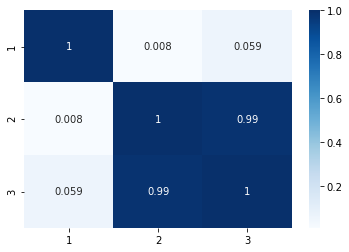

In [26]:
sns.heatmap(R, cmap='Blues', annot=True) # annot: 在heatmap中每个方格写入数据

In [8]:
# 求特征值 & 特征向量
W, V = np.linalg.eig(R)
W_diag = np.diag(W)
V = V.T # 这里需要转置
print('特征值: ', W)

特征值:  [0.9990421  1.9882966  0.01266129]


**判断 X 矩阵是否具有多重共线性:**

In [9]:
# 定义"判断多重共线性"的函数
# 参数: (X_list: 设计矩阵 X, thres_vif: VIF 方法判断多重共线性的阈值, thres_kappa: 特征值方法判断多重共线性的阈值)
def judge_col(X_list, thres_vif, thres_kappa): 
    var_num = X_list.shape[1]
    print('VIF方法判断结果(阈值为 %d): '% thres_vif)
    vif = [variance_inflation_factor(X_list, i) for i in range(var_num)]
    for i in range(var_num):
        if vif[i] >= thres_vif:
            print('设计矩阵 X 存在多重共线性.')
            break
        elif i == var_num-1:
            print('设计矩阵 X 不存在多重共线性.')

    print('\n特征值判定法判断结果(阈值为 %d): '% thres_kappa)
    kappa = []
    for i in range(var_num):
        kappa.append(np.sqrt(max(W) / W[i]))
    if np.max(kappa) >= thres_kappa:
        print('设计矩阵 X 存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))
    else:
        print('设计矩阵 X 不存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))

# 判断多重共线性
X_std1 = X_std[:,1:p+1] # 将 X 矩阵的截距项去掉
beta_std_hat1 = beta_std_hat[1:p+1] # 将 β_0 去掉 
judge_col(X_std1, 5, 10) # 判断多重共线性


VIF方法判断结果(阈值为 5): 
设计矩阵 X 存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 存在多重共线性，其中kappa值为：12.5315


**Q2:**  
岭参数 $k$ 选择(模型选择)的方法:   
1. 岭迹法
2. 方差扩大因子法
3. 霍尔-肯纳德（Hoerl-Kennad）公式
4. Mcdorard-Garaneau 公式

1. 岭迹法  
岭迹法的一般原则:   
· 系数岭估计基本稳定;    
· 最小二乘回归下符号不合理的回归系数, 在岭估计的意义下符号变得合理;    
· 回归系数合乎经济意义;  
· 残差平方和不会增大太多.

In [20]:
# [0, 1) 范围内划分的最大精细程度: [0,0.01,0.02,...,0.99]
range_const1 = 100

def RR1(K = 1):
    # 计算岭估计
    rang1 = []
    for i in range(K):
        rang1.append(i/K) # 岭参数 k 取值范围: [0,1-1/K](例如 K=10, k 取值范围: [0, 0.9])
    coefs_1 = []
    for k in rang1:
        temp1 = np.linalg.inv(X_std1.T @ X_std1 + k * np.eye(p)) @ X_std1.T @ Y_std
        coefs_1.append(temp1)

    # 画图
    # print('参数的数值: ', coefs_1)
    coefs_1 = np.array(coefs_1)
    for i in range(p):
        plt.plot(rang1, coefs_1[:,i], label = 'X%d'%(i+1))
    plt.legend(loc = 'best')

# 随着 K 值的增加, 岭参数 k 取值越精细, 因为在 [0,1) 范围内的分割更细
interact(RR1,K=(1,range_const1))

interactive(children=(IntSlider(value=1, description='K', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.RR1(K=1)>

In [13]:
# 调包: linear_model 
def RR2(K = 1): 
    # 初始化一个Ridge Regression
    clf = linear_model.Ridge(fit_intercept=False)

    # 训练模型: 测试不同的 k 取值，获得系数
    rang2 = []
    for i in range(K):
        rang2.append(i/K)
    coefs_2 = []
    for k in rang2:
        clf.set_params(alpha=k)
        clf.fit(X_std1, Y_std)
        coefs_2.append(clf.coef_)

    # 画图
    # print('参数的数值: ', coefs_2)
    coefs_2 = np.array(coefs_2)
    for i in range(p):
        plt.plot(rang2, coefs_2[:,i], label = 'X%d'%(i+1))   
    plt.legend(loc = 'best')

interact(RR2,K=(1,range_const1))

interactive(children=(IntSlider(value=1, description='K', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.RR2(K=1)>

In [14]:
# 岭参数 k 的最大取值范围: [exp(-10),exp(19)]
range_const2 = 30

def RR3(K = 1):
    # 初始化一个Ridge Regression
    clf = linear_model.Ridge(fit_intercept=False)
    
    # 训练模型: 测试不同的 k 取值，获得系数
    coefs_3 = []
    num_lambda3 = K
    for k in range(num_lambda3):
        clf.set_params(alpha=np.exp(k-10))  # 岭参数 k 取值范围: [exp(-10),exp((K-1)-10)]
        clf.fit(X_std1, Y_std)
        coefs_3.append(clf.coef_)

    # 画图
    # print('参数的数值：', coefs_3)
    x3 = range(num_lambda3)
    coefs_3 = np.array(coefs_3)
    for i in range(p):
        plt.plot(x3, coefs_3[:,i], label = 'X%d'%(i+1))
        plt.text(x3[-1], coefs_3[-1,i], '%.4f' % float(coefs_3[-1,i]), fontsize=8)
    print('岭参数为: ', np.exp(K-10))
    print('对应的岭估计: ', coefs_3[-1,:])
    plt.legend(loc = 'best')

interact(RR3,K=(1,range_const2))

interactive(children=(IntSlider(value=1, description='K', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.RR3(K=1)>

基于交叉验证的岭回归 alpha 选择可以直接获得一个相对不错的 alpha.

In [27]:
# 初始化一个Ridge Cross-Validation Regression
clf_cv = linear_model.RidgeCV(fit_intercept=False)
 
# 训练模型
clf_cv.fit(X_std1, Y_std)

k_cv = clf_cv.alpha_
coef_cv = clf_cv.coef_ 
print('k 的数值 : ', clf_cv.alpha_)
print('参数的数值：', clf_cv.coef_)

k 的数值 :  0.1
参数的数值： [0.06951731 0.32377326 0.55421425]


In [18]:
# 验证岭估计和最小二乘估计之间的关系
thres_k = int(k_cv * range_const1)
print(coef_cv)

C1 = X_std1.T @ X_std1
C2 = np.linalg.inv(C1 + k_cv * np.eye(p))
C3 = C2 @ C1
print(C3 @ beta_std_hat1)

diff = coef_cv - C3 @ beta_std_hat1
print('差异: ', diff)


[0.06951731 0.32377326 0.55421425]
[0.06951731 0.32377326 0.55421425]
差异:  [-1.83186799e-15 -4.44089210e-16 -1.88737914e-15]


2. 方差扩大因子法

岭参数为:  0.049787068367863944
对应的岭估计:  [0.06766744 0.24318693 0.65651749]


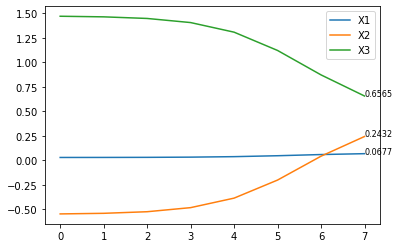

In [53]:
coefs_4 = []
thres_vif = 5
num_lambda4 = 30
judge = True
for k in range(num_lambda4):
    cnt = 0
    C = np.linalg.inv(C1 + np.exp(k-10) * np.eye(p)) @ C1 @np.linalg.inv(C1 + np.exp(k-10) * np.eye(p))
    # print(k, C)
    temp4 = np.linalg.inv(X_std1.T @ X_std1 + np.exp(k-10) * np.eye(p)) @ X_std1.T @ Y_std
    coefs_4.append(temp4)
    
    # 给定 k, 使得所有方差扩大因子 C[j][j] <= thres_vif
    for j in range(p):
        if C[j][j] < thres_vif:
            cnt += 1
        else:
            break
    if cnt == p:
        k4 = np.exp(k-10)
        print('岭参数为: ', np.exp(k-10))
        print('对应的岭估计: ', temp4)
        break

# 画图
coef_4 = temp4
# print('参数的数值：', coefs_4)
x4 = range(k+1)  # 以 k 作为横坐标
# x4 = []  # 以 np.exp(k) 作为横坐标
# for i in range(k+1):
#      x4.append(np.exp(i-10))
coefs_4 = np.array(coefs_4)
for i in range(p):
    plt.plot(x4, coefs_4[:,i], label = 'X%d'%(i+1))
    plt.text(x4[-1], coefs_4[-1,i], '%.4f' % float(coefs_4[-1,i]), fontsize=8)

plt.legend(loc = 'best')
plt.show()

3. 霍尔-肯纳德（Hoerl-Kennad）公式  

In [31]:
SSE = sum((Y_std - Y_std_hat) ** 2)
sigma2 = SSE / (n - p - 1)

Z = X_std1 @ V.T
alpha_hat = np.linalg.inv(W_diag) @ Z.T @ Y_std
# print(alpha_hat)

k_HK = sigma2 / max(alpha_hat**2)
k5 = k_HK
print('岭参数 k_HK: ', k5)
coef_5 = np.linalg.inv(X_std1.T @ X_std1 + k5 * np.eye(p)) @ X_std1.T @ Y_std
print('对应的岭估计: ', coef_5)


岭参数 k_HK:  0.009654230925930096
对应的岭估计:  [ 0.05095751 -0.11626096  1.03462265]


4. Mcdorard-Garaneau 公式  
如果 $Q=||\hat{\beta}||^2-\hat{\sigma}^2\sum_{j=1}^p\lambda_j^{-1} \leq 0$，则认为 $\hat{\beta}$ 的各个分量都差不多，此时，对 $\hat{\beta}$ 不进行压缩，选择 $k = 0$

In [14]:
thres_diff = 0.2
beta_compress = beta_std_hat1.T @ beta_std_hat1 - sigma2 * sum(1/W)
if beta_compress <= 0:
    k6 = 0
    print('k = 0, 不对最小二乘估计进行压缩.')
else:
    print('Q: ', beta_compress)
    coefs_6 = []
    num_lambda6 = 30
    for k in range(num_lambda6):
        temp6 = np.linalg.inv(X_std1.T @ X_std1 + np.exp(k-10) * np.eye(p)) @ X_std1.T @ Y_std
        beta_k_compress = temp6.T @ temp6
        if abs(beta_compress-beta_k_compress) < thres_diff:
            k6 = np.exp(k-10)
            print('岭参数为: ', k6)
            print('对应的岭估计: ', temp6)
            break
coef_6 = temp6

Q:  0.8881322270491734
岭参数为:  0.01831563888873418
对应的岭估计:  [0.05876355 0.0420594  0.87207132]


**Q3:**

In [15]:
beta_rr = coef_cv
print('岭参数 k = ', k_cv)
print('原始的最小二乘估计 = ', beta_hat[1:p+1])
print('标准化后的最小二乘估计 = ', beta_std_hat1)
print('\n')
print('原始 beta = ', beta[1:p+1])
print('岭估计 = ', beta_rr)
print('还原岭估计 = ', beta_rr *  np.sqrt(Y_L) / np.sqrt(X_L))


岭参数 k =  0.1
原始的最小二乘估计 =  [ 0.65713327 -7.18553507 18.07349643]
标准化后的最小二乘估计 =  [ 0.02878265 -0.55114531  1.47472353]


原始 beta =  [2 4 6]
岭估计 =  [0.06951731 0.32377326 0.55421425]
还原岭估计 =  [1.58714169 4.221181   6.79218113]


由此可知, 岭参数取值为 0.1 左右时，还原后的岭估计接近原始（上帝视角下）的 $\beta$.

## 第九周练习题 
统计方法：Multicollinearity-Ridge Regression  
软件：Jupyter Notebook  
作业发到钉钉群  
Deadline：下周一晚上10：00之前交  
注：要有完整的解题过程，不能只有代码